# Data Understanding & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Raw Data

In [2]:
file_path = "../data/raw/household_power_consumption.txt"

df = pd.read_csv(
    file_path,
    sep=';',
    low_memory=False
)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Basic Inspection

In [4]:
df.shape

(2075259, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


### Proper Datetime Parsing

In [8]:
# Reload raw data with missing values handled properly
file_path = "../data/raw/household_power_consumption.txt"

df = pd.read_csv(
    file_path,
    sep=';',
    na_values='?',   # treat ? as missing
    low_memory=False
)

# Combine Date and Time
df['datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

# Drop original columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Set datetime as index
df.set_index('datetime', inplace=True)

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
# sorting dataset by timeset
df.sort_index(inplace=True)

In [10]:
# converting object columns into numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [11]:
# analyzing missing values
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Resampling Dataset from minute to hourly

In [ ]:
# Select target 
target = 'Global_active_power'

# Resample to hourly frequency
df_hourly = df[[target]].resample('H').mean()

df_hourly.head()

C:\Users\saifu_y\AppData\Local\Temp\ipykernel_30004\2435385098.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df[[target]].resample('H').mean()


,Global_active_power
datetime,
2006-12-16 17:00:00,4.222889
2006-12-16 18:00:00,3.632200
2006-12-16 19:00:00,3.400233
2006-12-16 20:00:00,3.268567
2006-12-16 21:00:00,3.056467


### Compare Raw vs Resampled

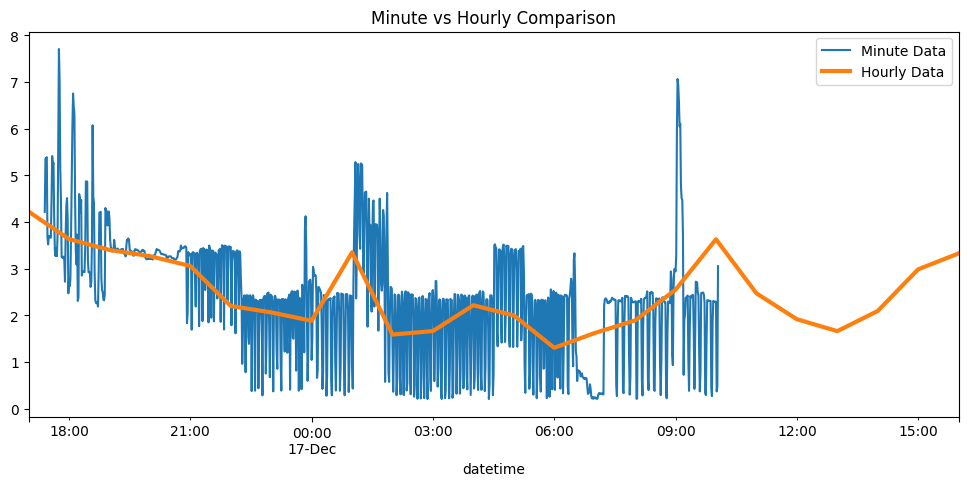

In [13]:
plt.figure(figsize=(12,5))

# Plot one week of minute data
df[target].iloc[:1000].plot(label='Minute Data')

# Plot corresponding hourly
df_hourly[target].iloc[:24].plot(label='Hourly Data', linewidth=3)

plt.legend()
plt.title("Minute vs Hourly Comparison")
plt.show()

In [14]:
# checking missing values after resampling
df_hourly.isna().sum()

Global_active_power    421
dtype: int64

In [15]:
df_hourly[target].fillna(method='ffill', inplace=True) # forward filling for rest of missing values

C:\Users\saifu_y\AppData\Local\Temp\ipykernel_30004\693670550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hourly[target].fillna(method='ffill', inplace=True) # forward filling for rest of missing values
C:\Users\saifu_y\AppData\Local\Temp\ipykernel_30004\693670550.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly[target].fillna(method='ffill', inplace=True) # forward filling for rest of missing values


In [19]:
df_hourly[target] = df_hourly[target].round(4)

In [20]:
# save processed dataset
df_hourly.to_csv("../data/processed/hourly_energy.csv")

## Observations

**Dataset size:**
The dataset contains 2,075,259 rows and 9 measurement features, representing household electrical power consumption recorded over several years.

**Time span:**
The data covers the period from December 2006 to November 2010 (approximately 47 months).

**Missing value format:**
Missing values are represented by the symbol `"?"` in the raw dataset. Approximately 1–2% of the rows contain missing measurements. Date and time fields are complete, but some power-related measurements are missing.

**Target variable:**
The selected target variable for forecasting is **Global_active_power**, which represents the total active power consumption of the household (in kilowatts).

**Initial frequency:**
The dataset is recorded at a one-minute sampling frequency, meaning each row represents one minute of household power consumption.